In [433]:
#import user modules
import utils.helper_functions as hfun
import config as cf
import modules.thouless_times as thouless
import modules.spectral_functions as spec_fun
import modules.sff as sff_module
import modules.adiabatics as agp
import modules.anderson as anderson
import importlib
from utils.fit_functions import *
def reload_modules():
    importlib.reload(anderson)
    importlib.reload(hfun)
    importlib.reload(cf)
    importlib.reload(thouless)
    importlib.reload(spec_fun)
    importlib.reload(agp)
    importlib.reload(sff_module)

reload_modules()

from utils.fit_functions import *
#--- importet in user module
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
import os
from utils import exit
from os import sep as kPSep
from os.path import exists

#--- other modules
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from joblib import Parallel, delayed
import copy
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors
from scipy.special import binom
import sympy as sym
from scipy.optimize import curve_fit as fit

print(cf.base_directory)
from cmath import nan
import h5py    


user_settings = getattr(cf.plot_settings, 'settings')


../results/HEISENBERG/disorder/PBC/


## MODEL FROM HAQUE2020 with all terms
$$
H=\sum_{\alpha=1}^2J_\alpha\sum_\ell\left[ (1-\eta_\alpha)S^x_\ell S^x_{\ell+\alpha} + (1+\eta_\alpha)S^y_\ell S^y_{\ell+\alpha}
                                            +\Delta_\alpha S^z_\ell S^z_{\ell+\alpha}\right]\\
            + h_z\sum_\ell\left(1-\frac{1}{2}\delta_{jL}\right)S^z_\ell + h_x\sum_\ell\left(1-\frac{1}{2}\delta_{j1}\right)S^x_\ell\\
            $$
Parameters (unless stated otherwise -- parameter scans):
$$
J_1=J_2=1.0\\
\eta_1=\eta_2=0.5\\
\Delta_1=\Delta_2=0.9\\
h_z=0.8\\
h_x=0.2
$$

Text(0.5, 1.0, 'Variance of entropy Entropy for all eigenstates')

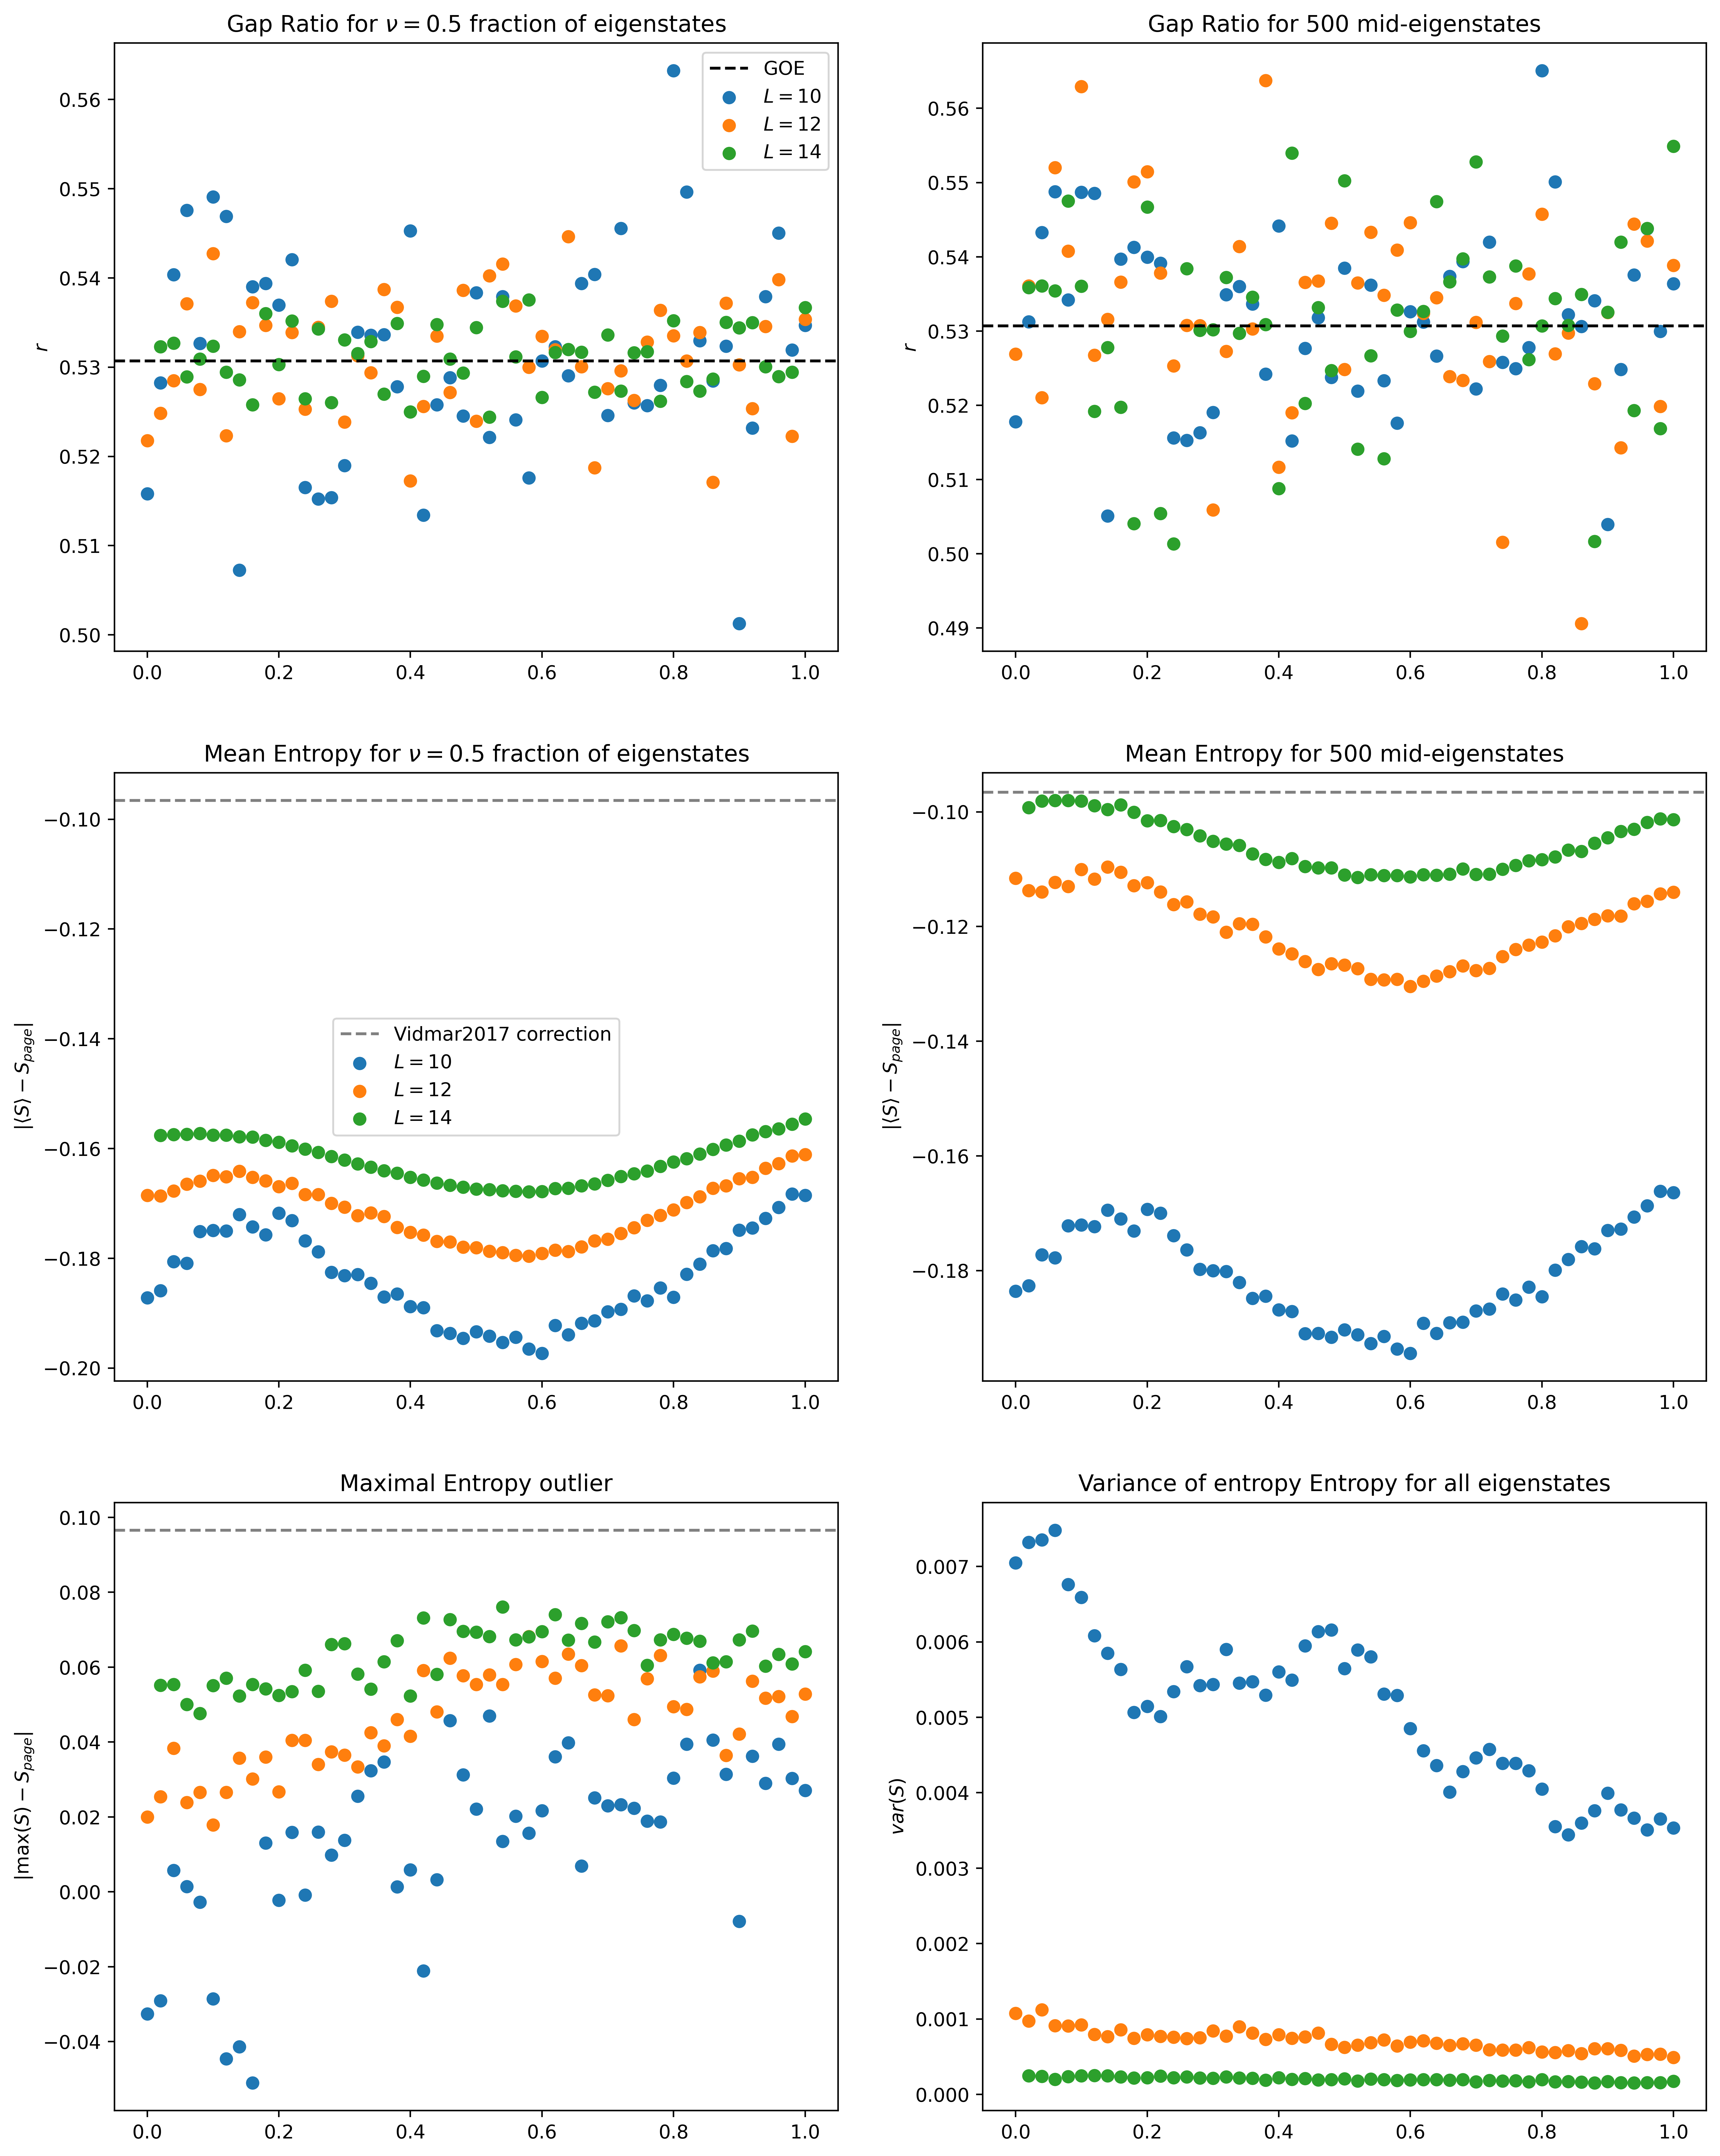

In [434]:

dir = "../results/XYZ/disorder/OBC/Entropy/Eigenstate/old XYZ model with 3 parity breaking/"
L=10
J=0.5
J0=0.5
g=0.9
g0=0.9
h=0.8
w=0.2

fig, ax = plt.subplots( nrows=3, ncols=2, figsize=(15,20), dpi = 500)

y_list = hfun.regspace(0.0, 1.02, 0.02)
sizes = [10, 12, 14]

for L in sizes:
    Smax = L * np.log(2) / 2. + (0.5 - np.log(2)) / 2. - 0.5
    Spage = L * np.log(2) / 2. - 0.5

    Smean = []
    Smean_500 = []
    Smax = []
    Svar = []
    gap_ratio = []
    gap_ratio_500 = []
    for J2 in y_list:
        info = hfun.info_dis(L, J2, J0, g, g0, h, w)
        info = dir + info[0 : info.index('.dat') :]

        filename = info + "_subsize=%d_jobid=0.hdf5"%(L/2)
        if exists(filename):
            data = []
            with h5py.File(filename, "r") as f:
                # Print all root level object names (aka keys) 
                # these can be group or dataset names 
                #print("Keys: %s" % f.keys())
                energies = np.array(f.get('energies')[0])
                entropy = np.array(f.get('entropy')[0])
        
            size = energies.size
            my_min = int(0.5 * size - 250)
            my_max = int(0.5 * size + 250)
            if my_min < 0: my_min = int(0.1 * size)
            if my_max > size: my_max = int(0.9 * size)
            
            Smax.append((Spage - max(entropy)))
            meanS = (np.mean(entropy[int(0.25 * size):int(0.75 * size)]) - Spage)
            Smean.append(meanS)

            sample = entropy[my_min : my_max]
            meanS = (np.mean(sample) - Spage)
            Smean_500.append(meanS)
            Svar.append(np.var(sample))

            gaps = np.diff(energies)
            
            ratio = 0
            counter = 0
            for i in range(int(0.25 * size), int(0.75 * size)):
                ratio += min(gaps[i], gaps[i + 1]) / max(gaps[i], gaps[i + 1])
                counter += 1
            gap_ratio.append(ratio / counter)


            ratio = 0
            counter = 0
            for i in range(int(my_min), int(my_max)):
                ratio += min(gaps[i], gaps[i + 1]) / max(gaps[i], gaps[i + 1])
                counter += 1
            gap_ratio_500.append(ratio / counter)
        else:
            gap_ratio_500.append(np.nan)
            gap_ratio.append(np.nan)
            Smean_500.append(np.nan)
            Smean.append(np.nan)
            Svar.append(np.nan)
            Smax.append(np.nan)


    ax[0][0].scatter(y_list, gap_ratio, label=r"$L=%d$"%L);            ax[0][0].set_ylabel(r"$r$")
    ax[0][1].scatter(y_list, gap_ratio_500, label=r"$L=%d$"%L);        ax[0][1].set_ylabel(r"$r$")
    ax[1][0].scatter(y_list, Smean, label=r"$L=%d$"%L);                ax[1][0].set_ylabel(r"$|\langle S\rangle - S_{page}|$")
    ax[1][1].scatter(y_list, Smean_500, label=r"$L=%d$"%L);            ax[1][1].set_ylabel(r"$|\langle S\rangle - S_{page}|$")
    ax[2][0].scatter(y_list, Smax, label=r"$L=%d$"%L);                 ax[2][0].set_ylabel(r"$|\max(S) - S_{page}|$")
    ax[2][1].scatter(y_list, Svar, label=r"$L=%d$"%L);                 ax[2][1].set_ylabel(r"$var(S)$")

ax[0][0].axhline(y=0.5307, linestyle='--', color='black', label='GOE')
ax[0][1].axhline(y=0.5307, linestyle='--', color='black', label='GOE')
ax[0][0].legend()
ax[1][0].axhline(y=(0.5 - np.log(2)) / 2., linestyle='--', color='gray', label='Vidmar2017 correction')
ax[1][1].axhline(y=(0.5 - np.log(2)) / 2., linestyle='--', color='gray', label='Vidmar2017 correction')
ax[1][0].legend()
ax[2][0].axhline(y=np.abs(0.5 - np.log(2)) / 2., linestyle='--', color='gray', label='Vidmar2017 correction')
#ax[2][1].axhline(y=(0.5 - np.log(2)) / 2., linestyle='--', color='gray', label='Vidmar2017 correction')
ax[0][0].set_title(r"Gap Ratio for $\nu=0.5$ fraction of eigenstates")
ax[0][1].set_title(r"Gap Ratio for 500 mid-eigenstates")
ax[1][0].set_title(r"Mean Entropy for $\nu=0.5$ fraction of eigenstates")
ax[1][1].set_title(r"Mean Entropy for 500 mid-eigenstates") 
ax[2][0].set_title(r"Maximal Entropy outlier")
ax[2][1].set_title(r"Variance of entropy Entropy for all eigenstates")        

## LOADER FUNCTION

In [443]:

dir = "../results/XYZ/disorder/OBC/Entropy/Eigenstate/"
L=10
J=0.5
J0=0.5
g=0.9
g0=0.1
h=0.8
w=0.1

y_list = (hfun.regspace(0.0, 2.1, 0.1))
x_list = (hfun.regspace(0.0, 2.1, 0.1))

def get_data(L=10, vs1 = 'h', vs2 = 'J', J=1.0, J0=J0, g=g, g0=g0, h=h, w=w, x_list = None, y_list = None):
    if y_list is None: y_list = (hfun.regspace(0.0, 2.1, 0.1))
    if x_list is None: x_list = (hfun.regspace(0.0, 2.1, 0.1))
    
    Srand_max = L * np.log(2) / 2. + (0.5 - np.log(2)) / 2. - 0.5
    Spage = L * np.log(2) / 2. - 0.5

    Smean = []
    Smax = []
    Svar = []
    gap_ratio = []
    
    for x in x_list:
        Smean_tmp = []
        Smax_tmp = []
        Svar_tmp = []
        gap_ratio_tmp = []

        for y in y_list:
            if vs2 == 'J':      info = hfun.info_dis(L, y, J0, x, g0, h, w) if vs1 == 'g' else hfun.info_dis(L, y, J0, g, g0, x, w)
            elif vs2 == 'g0':   info = hfun.info_dis(L, J, J0, x, y, h, w) if vs1 == 'g' else hfun.info_dis(L, J, J0, g, y, x, w)
            else: info = hfun.info_dis(L, J, J0, g, g0, h, w)
            
            info = dir + info[0 : info.index('.dat') :]

            filename = info + "_subsize=%d_jobid=0.hdf5"%(L/2)
            
            if exists(filename):
                data = []
                with h5py.File(filename, "r") as f:
                    # Print all root level object names (aka keys) 
                    # these can be group or dataset names 
                    #print("Keys: %s" % f.keys())
                    energies = np.array(f.get('energies')[0])
                    entropy = np.array(f.get('entropy')[0])
                    
                size = energies.size
                
                my_min = int(0.5 * size - 250)
                my_max = int(0.5 * size + 250)
                if my_min < 0: my_min = int(0.1 * size)
                if my_max > size: my_max = int(0.9 * size)

                Smax_tmp.append((Srand_max - max(entropy)))

                sample = entropy[my_min : my_max]
                meanS = (np.mean(sample) - Srand_max)
                Smean_tmp.append(meanS)
                Svar_tmp.append(np.var(sample))

                gaps = np.diff(energies)

                ratio = 0
                counter = 0
                for i in range(int(0.25 * size), int(0.75 * size)):
                    ratio += min(gaps[i], gaps[i + 1]) / max(gaps[i], gaps[i + 1])
                    counter += 1
                gap_ratio_tmp.append(ratio / counter)

            else:
                gap_ratio_tmp.append(np.nan)
                Smean_tmp.append(np.nan)
                Svar_tmp.append(np.nan)
                Smax_tmp.append(np.nan)

        Smean.append(np.array(Smean_tmp))
        Smax.append(np.array(Smax))
        Svar.append(np.array(Svar))
        gap_ratio.append(np.array(gap_ratio_tmp))

    Smean = np.array(Smean)
    gap_ratio = np.array(gap_ratio)
    Svar = np.array(Svar)
    Smax = np.array(Smax)

    return gap_ratio, Smean, Smax, Svar


def plot_data(L=10, vs1 = 'h', vs2 = 'J', J=J, J0=J0, g=g, g0=g0, h=h, w=w, x_list = None, y_list = None, maxX = None, maxY = None, two_color_scales = True, plot_gaps = False):
    if y_list is None: y_list = (hfun.regspace(0.0, 2.1, 0.1))
    if x_list is None: x_list = (hfun.regspace(0.0, 2.1, 0.1))
    gap_ratio, Smean, Smax, Svar = get_data(L=L, vs1=vs1, vs2=vs2, J=J, J0=J0, g=g, g0=g0, h=h, w=w, x_list=x_list, y_list=y_list)

    skipX = int(x_list.size / 7)
    skipY = int(y_list.size / 7)

    lab1 = "h_x" if vs2 == 'g0' else "J_2"
    lab2 = "\Delta" if vs1 == 'g' else "h_z"

    hcuts = [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.5]

    if plot_gaps:
        fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(10, 4), dpi = 100)
        X, Y = np.meshgrid(x_list, y_list)
        p = ax[1].pcolormesh(X, Y, gap_ratio, shading='flat', vmin=0.38, vmax=0.54)
        ax[1].set_xlabel(r"")
        fig.colorbar(p)

        for h in hcuts:
            idx = hfun.find_index(x_list, h)
            if idx >=0 :
                ax[0].plot(y_list, gap_ratio[idx], label=r"$" + lab2 + "=%.1f$"%h)

        ax[0].set_xlabel(r"$" + lab1 + "\ /\ J_1$")
        ax[0].set_ylabel(r"$r$")
        ax[1].set_xlabel(r"$" + lab1 + "\ /\ J_1$")
        ax[1].set_ylabel(r"$" + lab2 + "\ /\ J_1$")
        ax[0].legend()

        ax[1].set_xticks(x_list[:-1:skipX] + x_list[1] / 2.)
        ax[1].set_yticks(y_list[:-1:skipY] + y_list[1] / 2.)
        ax[1].set_xticklabels(["%.2f"%x for x in x_list[:-1:skipX]])
        ax[1].set_yticklabels(["%.2f"%x for x in y_list[:-1:skipY]])

        if maxX is None:    maxX = max(x_list)
        if maxY is None:    maxY = max(y_list)
        ax[1].set_xlim(min(x_list), maxX)
        ax[1].set_ylim(min(y_list), maxY)
        ax[0].set_ylim(0.38, 0.54)

        ax[0].axhline(y=0.5307, linestyle='--', color='black', label='GOE')
        ax[0].axhline(y=0.3867, linestyle='--', color='black', label='Poisson')


    fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(10, 4), dpi = 100)

    num_tot = 512
    test = []
    for Sarr in Smean:
        for S in Sarr:
            if np.isnan(S) == False:
                test.append(S)
                
    idx_0 = np.abs(min(test) / (max(test) - min(test)))
    
    v_min = -0.2
    v_max = 0.1  if two_color_scales else 0.0
    idx_0 = np.abs(v_min) / (v_max - v_min)
    colors = []
    if two_color_scales:
        lower = plt.get_cmap('viridis', 100)(np.linspace(0, 1, int(idx_0 * num_tot)))
        white = plt.get_cmap('seismic', 100)(0.5*np.ones(6))
        upper = plt.get_cmap('gist_rainbow', 100)(np.linspace(0, 1, int((1-idx_0) * num_tot)-2))
        colors = np.vstack((lower, white, upper))  
    else:
        colors = plt.get_cmap('viridis', 100)(np.linspace(0, 1, int(num_tot)))
    mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

    X, Y = np.meshgrid(x_list, y_list)
    p = ax[1].pcolormesh(X, Y, Smean, cmap=mymap, shading='flat', vmin = v_min, vmax = v_max)

    # countour needs the center points
    x_center = 0.5 * (x_list[:-1] + x_list[1:])
    y_center = 0.5 * (y_list[:-1] + y_list[1:])

    levels = np.arange(-0.2, 0.1, 0.05) if two_color_scales else np.arange(-0.2, 0.0, 0.05)
    cset = ax[1].contour(X, Y, Smean, levels, colors='k')
    ax[1].clabel(cset, inline=True)
    fig.colorbar(p)

    for h in hcuts:
        idx = hfun.find_index(x_list, h)
        if idx >=0 :
            ax[0].plot(y_list, Smean[idx], label=r"$" + lab2 + "=%.1f$"%h)

    ax[0].set_xlabel(r"$" + lab1 + "\ /\ J_1$")
    ax[0].set_ylabel(r"$\langle S\rangle - S_{max}$")
    ax[0].axhline(y=0.0, linestyle='--', color='black')
    if v_max > 0.09: ax[0].axhline(y=-(0.5 - np.log(2)) / 2., linestyle='--', color='red', label=r"$S_{page}-S_{max}$")
    ax[0].legend(fontsize=8)
    ax[0].set_ylim(v_min, v_max)

    ax[0].set_title(r"$S_{max}=\frac{L}{2}\ln2-\frac{1}{2}+\frac{0.5-\ln2}{2}$ -- VidmarRigol2017", fontsize=10)
    if two_color_scales:
        if vs1 == 'h' and vs2 == 'J': ax[1].set_title(r"$L=%d,J_1=1.0,\Delta_1=\Delta_2=0.9,\eta_1=\eta_2=%.2f,h^x=%.2f$"%(L,J0,g0), fontsize=10)
        elif vs1 == 'h' and vs2 == 'g0': ax[1].set_title(r"$L=%d,J_1=1.0,J_2=%.2f,\Delta_1=\Delta_2=0.9,\eta_1=\eta_2=%.2f$"%(L,J, J0), fontsize=10)
    else:
        if vs1 == 'h' and vs2 == 'J': ax[1].set_title(r"$L=%d,J_1=1.0,\Delta_1=\Delta_2=%.2f,\eta_1=\eta_2=%.2f,h^x=%.2f$"%(L,J0,g), fontsize=10)
        elif vs1 == 'g' and vs2 == 'J': ax[1].set_title(r"$L=%d,J_1=1.0,\Delta_1=\Delta,\Delta_2=0.3,\eta_1=\eta_2=%.2f,h^z=0.0$"%(L, J0), fontsize=10)

    ax[1].set_xlabel(r"$" + lab1 + "\ /\ J_1$")
    ax[1].set_ylabel(r"$" + lab2 + "\ /\ J_1$")
    
    ax[1].set_xticks(x_list[:-1:skipX] + x_list[1] / 2.)
    ax[1].set_yticks(y_list[:-1:skipY] + y_list[1] / 2.)
    ax[1].set_xticklabels(["%.2f"%x for x in x_list[:-1:skipX]])
    ax[1].set_yticklabels(["%.2f"%x for x in y_list[:-1:skipY]])
    
    if maxX is None:    maxX = max(x_list)
    if maxY is None:    maxY = max(y_list)
    ax[1].set_xlim(min(x_list), maxX)
    ax[1].set_ylim(min(y_list), maxY)
    


## SU(2) BROKEN WITH BROKEN PARITY (LOCAL IMPURITY)

$$
H=\sum_{\alpha=1}^2J_\alpha\sum_\ell\left[ (1-\eta_\alpha)S^x_\ell S^x_{\ell+\alpha} + (1+\eta_\alpha)S^y_\ell S^y_{\ell+\alpha}
                                            +\Delta_\alpha S^z_\ell S^z_{\ell+\alpha}\right] + \sum_\ell h^z_\ell S^z_\ell + h_x S^x_1
            $$
Parameters (unless stated otherwise -- parameter scans):
$$
J_1=J_2=1.0\\
\eta_1=\eta_2=0.5\\
\Delta_1=\Delta_2=0.9\\
\\
h^z_\ell=\left\{\begin{array}{cc}
w& \ell=L\\
h^z&\text{otherwise}
\end{array}\right.\\
w=0.1\\
h^z=0.8
$$
Varying $h_z$ and $J_2$

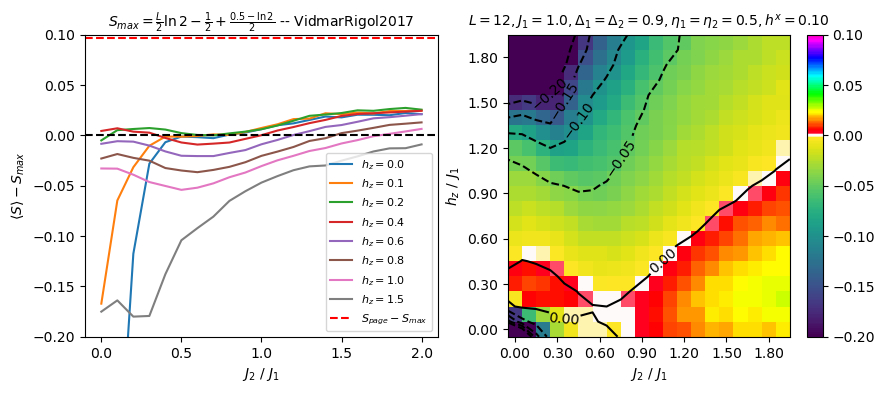

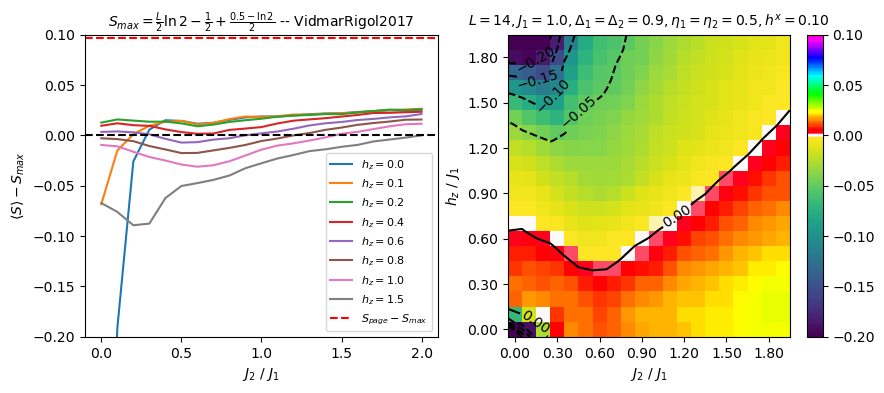

In [436]:
L=14
J=0.5
J0=0.5
g=0.9
g0=0.1
h=0.8
w=0.1
plot_data(L=12, vs1='h', vs2='J', J=J, J0=J0, g=g, g0=g0, h=h, w=w)
plot_data(L=14, vs1='h', vs2='J', J=J, J0=J0, g=g, g0=g0, h=h, w=w)

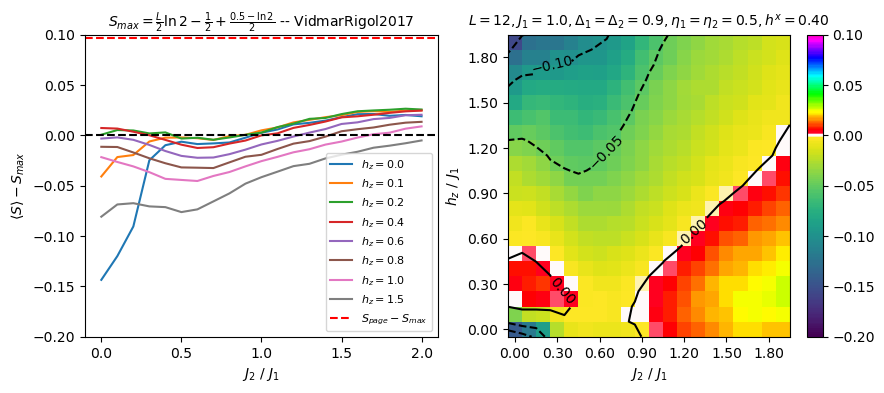

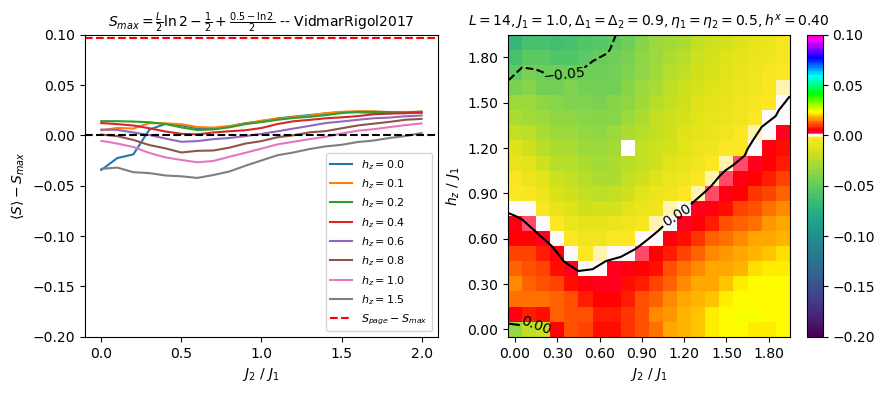

In [437]:
L=14
J=0.5
J0=0.5
g=0.9
g0=0.4
h=0.8
w=0.1

plot_data(L=12, vs1='h', vs2='J', J=J, J0=J0, g=g, g0=g0, h=h, w=w)
plot_data(L=14, vs1='h', vs2='J', J=J, J0=J0, g=g, g0=g0, h=h, w=w)

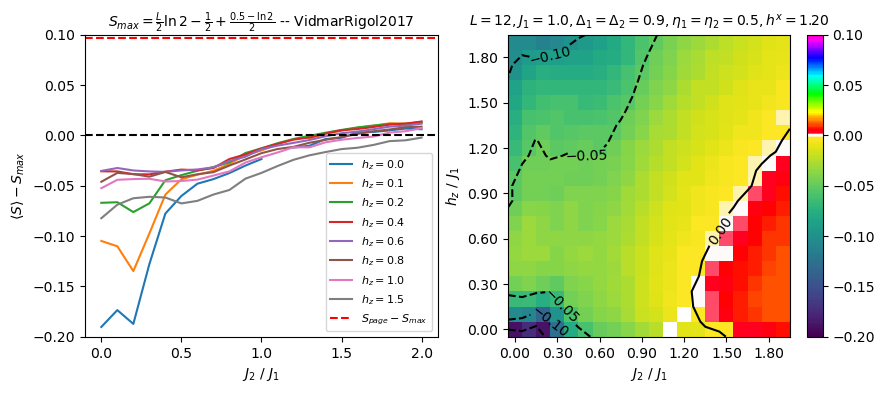

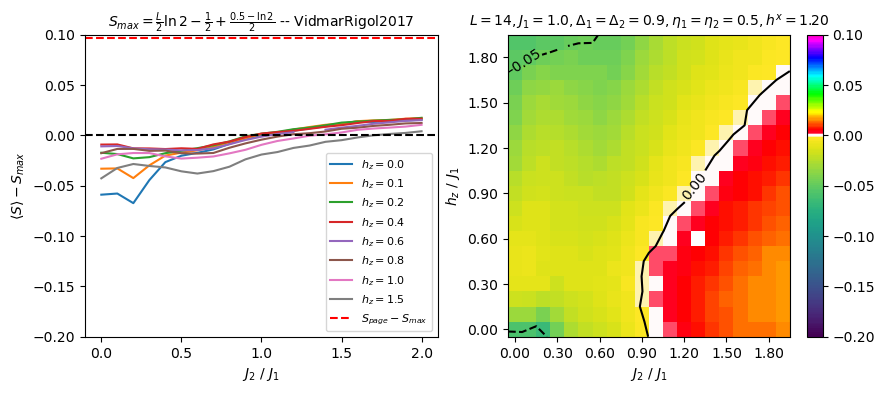

In [438]:
L=14
J=0.5
J0=0.5
g=0.9
g0=1.2
h=0.8
w=0.1

plot_data(L=12, vs1='h', vs2='J', J=J, J0=J0, g=g, g0=g0, h=h, w=w)
plot_data(L=14, vs1='h', vs2='J', J=J, J0=J0, g=g, g0=g0, h=h, w=w)

## BROKEN PARITY (LOCAL IMPURITY BOTH X AND Z FIELD) WITH $J_2=0$ 

$$
H=\sum_{\alpha=1}^2J_\alpha\sum_\ell\left[ (1-\eta_\alpha)S^x_\ell S^x_{\ell+\alpha} + (1+\eta_\alpha)S^y_\ell S^y_{\ell+\alpha}
                                            +\Delta_\alpha S^z_\ell S^z_{\ell+\alpha}\right] + \sum_\ell \left(h^z S^z_\ell + h_x S^x_\ell\right) + w\left(S^z_{L} + S^x_1\right)
            $$
Parameters (unless stated otherwise -- parameter scans):
$$
J_1=1.0\\
J_2=0.0\\
\eta_1=\eta_2=0.5\\
\Delta_1=\Delta_2=0.9\\
w=0.1\\
h^z=0.8
$$
Varying $h_z$ and $J_2$

### SU(2) BROKEN

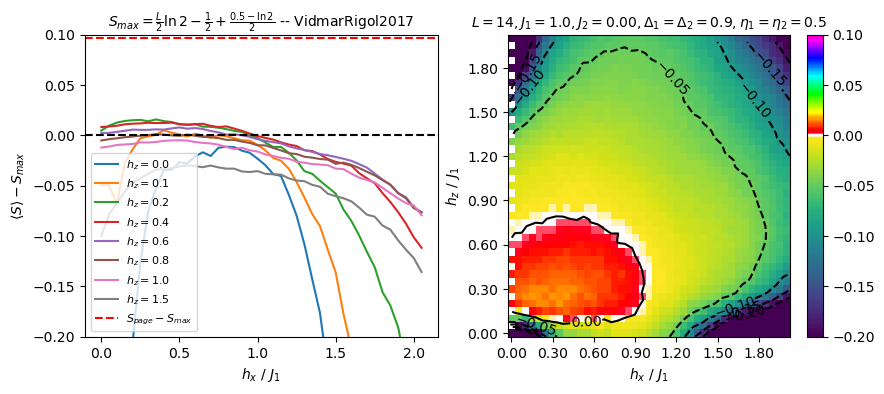

In [439]:
L=14
J=0.0
J0=0.5
g=0.9
g0=0.0
h=0.0
w=0.1

y = (hfun.regspace(0.0, 2.1, 0.05))
x = (hfun.regspace(0.0, 2.1, 0.05))
plot_data(L=L, vs1='h', vs2='g0', J=J, J0=J0, g=g, g0=g0, h=h, w=w, x_list=x, y_list=y)

### SU(2) CONSERVED

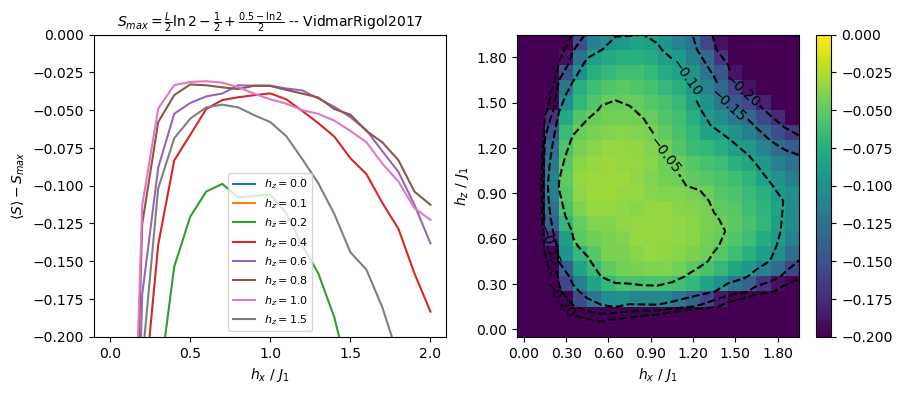

In [440]:
L=14
J=0.0
J0=0.0
g=0.9
g0=0.0
h=0.0
w=0.1

plot_data(L=L, vs1='h', vs2='g0', J=J, J0=J0, g=g, g0=g0, h=h, w=w, two_color_scales=False)

## SU(2) CONSERVED WITH BROKEN PARITY (LOCAL IMPURITY)

$$
H=\sum_{\alpha=1}^2J_\alpha\sum_\ell\left[S^x_\ell S^x_{\ell+\alpha} + S^y_\ell S^y_{\ell+\alpha}
                                            +\Delta_\alpha S^z_\ell S^z_{\ell+\alpha}\right] + h^z S^z_L
            $$
Parameters (unless stated otherwise -- parameter scans):
$$
J_1=J_2=1.0\\
\Delta_1=\Delta_2=0.9\\
h^z=0.1
$$
Varying $h_z$ and $J_2$

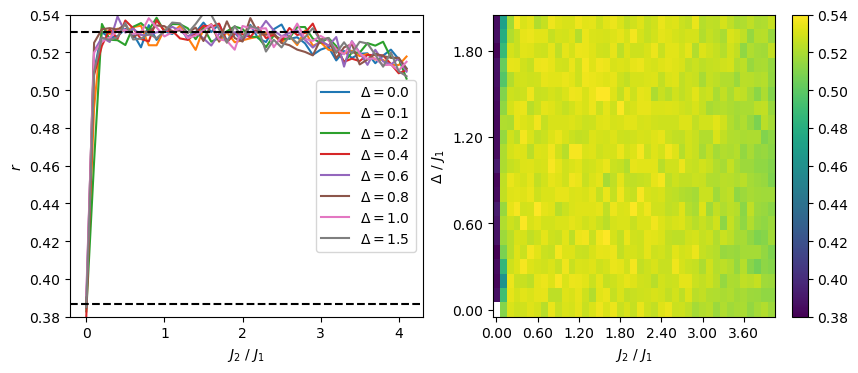

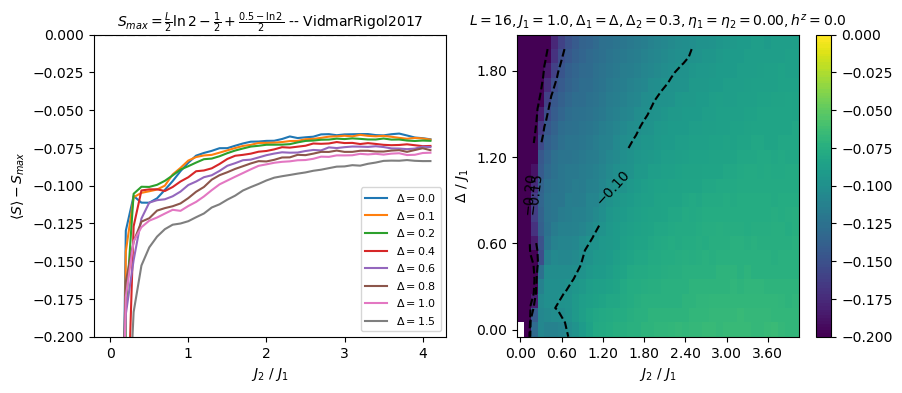

In [444]:
L=16
J=1.0
J0=0.0
g=0.9
g0=0.0
h=0.0
w=0.1

vs1_list = (hfun.regspace(0.0, 4.2, 0.1))
vs2_list = (hfun.regspace(0.0, 4.2, 0.1))
plot_data(L=L, vs1='g', vs2='J', J=J, J0=J0, g=g, g0=g0, h=h, w=w, x_list=vs1_list, y_list=vs2_list, maxY=2.1, two_color_scales=False, plot_gaps=True)


# COMPARE WITH MAKS

../results/XYZ/disorder/OBC/Entropy/Eigenstate/_L=10,J=1.00,J0=0.00,g=0.90,g0=0.00,h=0.00,w=0.10_subsize=5_jobid=0.hdf5
Keys: <KeysViewHDF5 ['energies', 'entropy']>
../results/XYZ/disorder/OBC/Entropy/Eigenstate_Maks_results/_xyz,Ns=10,Ja=1.00,Jb=1.00,hx=0.00,hz=0.00,da=0.90,db=0.90,ea=0.00,eb=0.00,pb=1,bc=1/en.h5
Keys: <KeysViewHDF5 ['energy']>
(1024,)
[-3.55271368e-15  3.55271368e-15 -7.10542736e-15 ... -3.55271368e-15
 -3.55271368e-15 -7.10542736e-15]
../results/XYZ/disorder/OBC/Entropy/Eigenstate/_L=10,J=1.00,J0=0.50,g=0.90,g0=0.00,h=0.80,w=0.10_subsize=5_jobid=0.hdf5
Keys: <KeysViewHDF5 ['energies', 'entropy']>
../results/XYZ/disorder/OBC/Entropy/Eigenstate_Maks_results/_xyz,Ns=10,Ja=1.00,Jb=1.00,hx=0.00,hz=0.80,da=0.90,db=0.90,ea=0.50,eb=0.50,pb=1,bc=1/en.h5
Keys: <KeysViewHDF5 ['energy']>
(1024,)
[ 3.55271368e-15  2.13162821e-14  0.00000000e+00 ...  0.00000000e+00
 -1.42108547e-14 -3.55271368e-15]


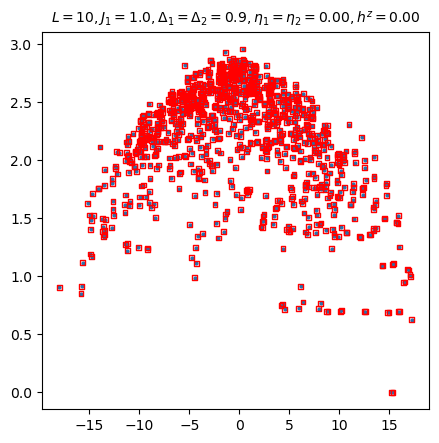

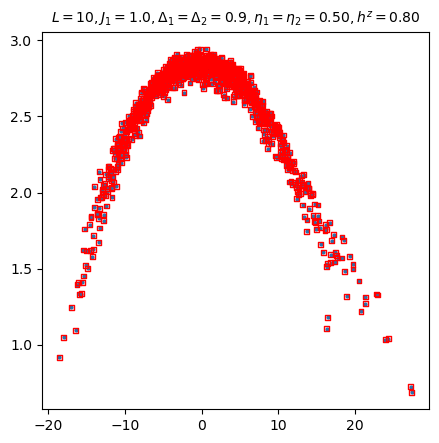

In [501]:
L=10

J=1.0
J0=0.5

g=0.9
g0=0.0

def testerere(J0 = 0.0):
    h=0.0 if J0 == 0.0 else 0.8
    w=0.1

    # LOAD RAFAŁ
    info = hfun.info_dis(L, J, J0, g, g0, h, w)
    info = dir + info[0 : info.index('.dat') : ]
    filename = info + "_subsize=%d_jobid=0.hdf5"%(L/2)
    print(filename)
    if exists(filename):
        data = []
        with h5py.File(filename, "r") as f:
            # Print all root level object names (aka keys) 
            # these can be group or dataset names 
            print("Keys: %s" % f.keys())
            energies = np.array(f.get('energies')[0])
            entropy = np.array(f.get('entropy')[0])

    # LOAD MAKS
    dir_maks = "../results/XYZ/disorder/OBC/Entropy/Eigenstate_Maks_results/_xyz,Ns=%d,Ja=1.00,Jb=%.2f,hx=%.2f,hz=%.2f,da=%.2f,db=%.2f,ea=%.2f,eb=%.2f,pb=1,bc=1/"%(L, J, g0, h, g, g, J0, J0)
    filename = dir_maks + "en.h5"
    fileS = dir_maks + "entropies.dat"
    print(filename)
    if exists(filename):
        data = []
        #energiesM = np.loadtxt(filename, unpack=True)
        with h5py.File(filename, "r") as f:
            # Print all root level object names (aka keys) 
            # these can be group or dataset names 
            print("Keys: %s" % f.keys())
            energiesM = np.transpose(np.array(f.get('energy'))[0])
            print(energiesM.shape)
    entropyM = np.array(pd.read_table(fileS, sep="\t", header=None)[0][4].split()).astype(float)

    print(energies - energiesM)

    fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(5, 5), dpi = 100)
    ax.scatter(energies, entropy, marker='o', s=4,label="Rafał")
    ax.scatter(energiesM, entropyM, marker = 's', facecolor='None', edgecolor='red', s=12, label="Maks")
    ax.set_title(r"$L=10,J_1=1.0,\Delta_1=\Delta_2=0.9,\eta_1=\eta_2=%.2f,h^z=%.2f$"%(J0,h), fontsize=10)

testerere(J0=0.0)
testerere(J0=0.5)